# Case study 4
This case study builds a model from the Hamersley region in Western Australia. The slip of the faults is rotated from a vertical vector by 30 degree increments. This experiment is geologically unlikely as usually some prior knowledge about the fault slip vector would be known. However, this demonstrates the possible experiments that can be done using loopstructural.

To run this experiment you will need:


* LoopStructural
* lavavu-osmesa (or lavavu on a desktop computer)
* pyamg - optimised solver
* matplotlib - for making figure grid
* mplstereonet - stereonet overlay on figure

If you are using google colab uncomment the following cell



In [3]:
# !pip install LoopStructural
# !pip install lavavu-osmesa
# !pip install pyamg
# !pip install matplotlib
# !pip install mplstereonet

In [2]:
import numpy as np
import random
import logging
from LoopStructural.utils.helper import rotation
from LoopStructural import GeologicalModel
import lavavu
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural import GeologicalModel
from LoopStructural.utils import log_to_file
from LoopStructural.analysis import displacement_missfit
from LoopStructural.utils import process_map2loop, build_model

In [1]:
log_to_file('test')

fault_params = {'interpolatortype':'FDI',
                'nelements':1e3,
#                 'data_region':.2, 
                'fault_buffer':0.4,
                'solver':'pyamg',
#                 overprints:overprints,
                'cpw':10,
                'npw':10}
foliation_params = {'nelements':1e4,  # how many tetras/voxels
                    'buffer':2.5,  # how much to extend nterpolation around box
                    'solver':'pyamg',
                    'npw':10,
                    'cpw':10,
                    'interpolatortype':'FDI',
                    'damp':True}
# global evaluate_value_calls 
view = LavaVuModelViewer()
images = {}
vectors = {}
for angle in np.arange(0,360,30):#[-90,-60,-30,0,30,60,90]:
    m2l_data = process_map2loop('./gmdpaper-faultslip')
    vectors[angle]={}
    for k,f in m2l_data['stratigraphic_column']['faults'].items():
        f['FaultSlip'] = np.dot(rotation(f['FaultNorm'],angle),f['FaultSlip'])
        vectors[angle][k] = f['FaultSlip']
        
    m2l_data['stratigraphic_column']
    model = build_model(m2l_data,
                        skip_faults=False,
                        rescale=False,
                        evaluate=False,
                        fault_params=fault_params,
                        foliation_params=foliation_params,
                        unconformities=False)
    model.update()
    view.clear()
    view.model = model
    view.nelements=5e6

    view.add_model()
    view.rotation = [-62.97486877441406, -32.8342399597168, -4.263551712036133]
    images[angle] = view.image_array()

2021-03-30 02:44:53,394 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.
2021-03-30 02:44:53,394 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.
2021-03-30 02:44:53,394 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

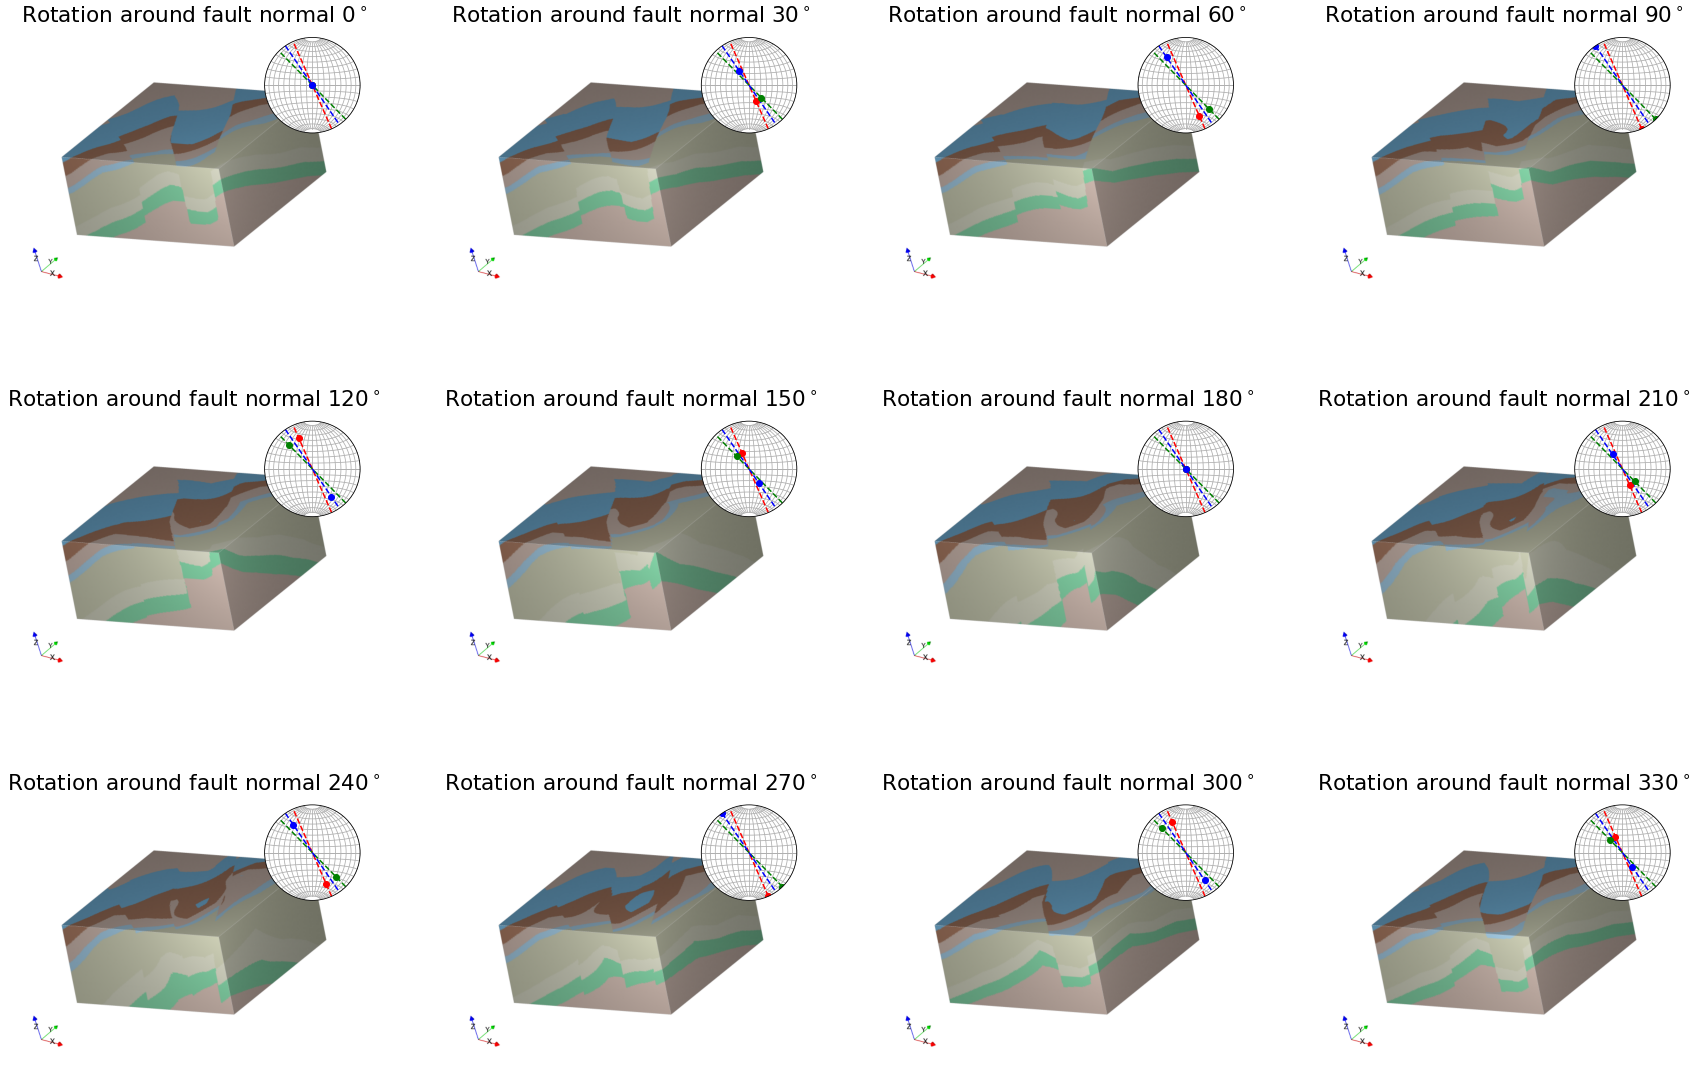

In [2]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mplstereonet import StereonetAxes
import matplotlib
import mplstereonet
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(3,4,figsize=(30,20))

# for j in range(3):
# #     ax[0,j].axis('off')
#     ax[0,j].imshow(images[-j*30])
# #     ax[1,j].axis('off')
#     ax[1,j].imshow(images[j*30])
#     ax[1,j].set_title('{}'.format(-(j+1)*30))
#     ax[0,j].set_title('{}'.format((j+1)*30))

for i,im in enumerate(images.values()):
    ax[i//4,i%4].axis('off')
    ax[i//4,i%4].imshow(im)
    ax[i//4,i%4].set_title(r'Rotation around fault normal ${}^\circ$'.format(i*30))
    
    stereo = inset_axes(ax[i//4,i%4], width="30%", height="35%", loc=1,axes_class=StereonetAxes)
    stereo.set_azimuth_ticks([])
    stereo.grid()
    v = vectors[i*30]
    colours = ['red','green','blue','orange']
    k = 0
    for fault in m2l_data['stratigraphic_column']['faults'].values():
#             print(fault)
#         print(colours[k])
        stereo.plane(*mplstereonet.vector2pole(*tuple(fault['FaultNorm'])),color=colours[k],linestyle='dashed')
        k+=1
    k=0
    for f,vec in v.items():
        if i*30 < 180:
            col = 'black'
        else:
            col = 'red'
        stereo.line(*mplstereonet.vector2plunge_bearing(*tuple(vec)),color=colours[k])
        k+=1
#     plt.figure()
# plt.tight_layout()